# Analyzing NYC Highschool data

#### Objectives:
    The aim of this project is to read data from several sources, clean, merge and try to find correlations between paramters such as demographics and SAT score results, etc.
    
    The data was provided by Dataquest.io platform.

##### Resources used:

**Anaconda distribution** - *Jupyter Notebook v 5.7.8*, *Python 3.7.3*

In [25]:
#first, we load up the data , creating a list of all the data files and adding them to a dicitonary

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re

data_files = ["ap_2010.csv","class_size.csv","demographics.csv","graduation.csv","hs_directory.csv","sat_results.csv"]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

In [26]:
#nreading in the survey data ( which is in txt format - tab delimited)

all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

#creating a DF by concatenating the surveys

survey = pd.concat([all_survey, d75_survey], axis=0, sort = True)

survey["DBN"] = survey["dbn"]

survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", 
    "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", 
    "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,survey_fields]

# adding the surveys to the dictionary of data

data["survey"] = survey

In [27]:
#examining some of the data

data["survey"].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [28]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [29]:
data["hs_directory"].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [30]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


From what we can see,**DBN columns** are the key to getting this data together - they are codes unique for schools from NYC.
However, we can notice that the *class_size* dataset is missing the column, but we can deduct that the code is made up from several other columns of the dataset. The **DBN** column will be thus , calculated, and we will continue to investigate and clean any wrong data in the **DBN** columns and go forward with our analysis.

In [31]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

#define a function to convert to numeric

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
#apply function to  class_size dataset

data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

Converting some columns from text to numeric,and some other data cleaning involved:


In [32]:
#defining the columns

cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

#adding up the values so we get the overall SAT results
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]


#cleaning up the longitude nad latitude data by using Regular expressions and creating new columns for them

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")



The class_size dataset contains information we don't need - best is to just select the rows that can help us in our objective.

In [34]:
# saving only the data we need from the class_size dataset
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

#grouping the results by the school and getting an average
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)

#re-attribuiting the dataset to our dictionary
data["class_size"] = class_size

#filtering data from demographics dataset
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

Some columns from the ap_2010 dataset need to be converted to numerical values also:

In [35]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

Now that the data is clean enough, we can go ahead and merge it into one final dataset that we will perform analysis on

In [36]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In order to map the schools, we need to extract the first two characters of each DBN number

In [37]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

Now we can proceed with finding correlations between our columns and the *SAT_Score* column

In [38]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

We will continnue by plotting the Correlations obtained and the survey fields needed to analyze

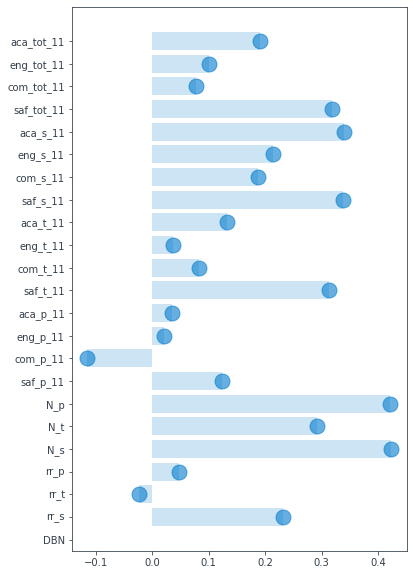

In [71]:
# Removing DBN field from the survey_fields column list
import seaborn as sns

%matplotlib inline
figure= plt.figure(figsize=(6,10))
x_pos = [i for i, _ in enumerate(survey_fields)]
plt.barh(x_pos, combined.corr()["sat_score"][survey_fields],color='#007acc', alpha=0.2, linewidth=5,);
plt.plot(combined.corr()["sat_score"][survey_fields], x_pos, "o", markersize=15, color='#007ACC', alpha=0.6)

plt.yticks(x_pos, survey_fields);

Based on the graph above, we can conclude that the biggest correlations are for *N_p*, *N_s*, *aca_s_11* and *sat_s_11* columns.
The last two are particullary interesting, as they refert to how the studens perceive academic standards and how the students perceive safety.

It would be interesting to see how safety affects the SAT scores, so we will follow up and investigate this in more detail further.


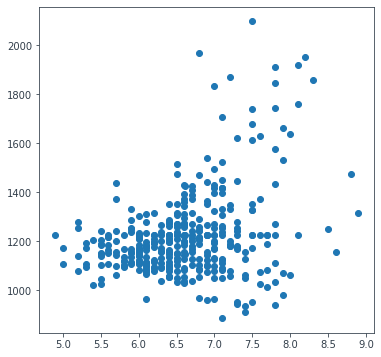

In [76]:
#plotting the safety rating over the SAT scores
figure = plt.figure(figsize=(6,6))
plt.scatter(combined["saf_s_11"],combined["sat_score"])


Based on the above plot we can see that in increase in saftey above 7 leads to an overall increase in SAT score. The correlation is not very high, but it is easy to spot.

Now we will try to MAP out safety scores


In [90]:
#importing basemap

import os
os.environ['PROJ_LIB'] = r'c:\Users\vlade\Anaconda3\Library\share\epsg'
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)
m = Basemap(projection='merc',llcrnrlat=40.496044,urcrnrlat=40.915256, llcrnrlon=-74.255735, urcrnrlon=-73.700272, resolution='i')
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')
longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\vlade\\Anaconda3\\Library\\share\\epsg\\epsg'

# Investigating racial differences!


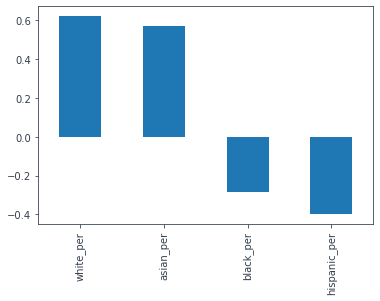

In [91]:
combined.corr()["sat_score"][["white_per","asian_per","black_per","hispanic_per"]].plot.bar()

In [ ]:
#hispanic_per - percentage of hispanic persons at that school

combined.plot(kind="scatter",x="hispanic_per",y="sat_score")

In [ ]:
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

In [ ]:
print(combined[combined["hispanic_per"] > 10]["SCHOOL NAME"].sort_values(ascending=False).head())

In [ ]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

In [ ]:
combined.corr()["sat_score"][["male_per","female_per"]].plot.bar()

In [ ]:
combined.plot(kind="scatter",x="female_per",y="sat_score")

In [ ]:
print(combined[(combined["female_per"]>60) & (combined["sat_score"]>1700)]["SCHOOL NAME"])

In [ ]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

In [ ]:
combined.plot(kind="scatter",x="ap_per",y="sat_score")

In [ ]:
#hard to say if there is any corellation
combined["ap_per","sat_score"].corr()